In [4]:
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('../cli_train.tsv',sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20010 entries, 0 to 20009
Data columns (total 11 columns):
일자             20010 non-null int64
time           20010 non-null object
식사내용           20010 non-null object
매출일자           20010 non-null float64
수량             20010 non-null float64
일시             20010 non-null object
평균기온(°C)       20010 non-null float64
최저기온(°C)       20010 non-null float64
최고기온(°C)       20010 non-null float64
강수 계속시간(hr)    20010 non-null float64
일강수량(mm)       20010 non-null float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1.7+ MB


/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


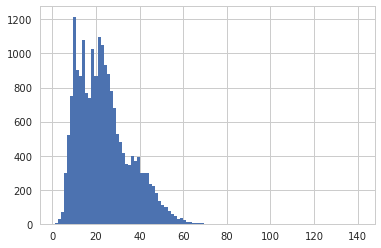

In [5]:
df['수량'].hist(bins=100)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
def tokenize(text):
    return text.split(',')
vectorizer = TfidfVectorizer(tokenizer=tokenize)
bow = vectorizer.fit_transform(df['식사내용']).toarray()
df = df.join(pd.DataFrame(bow,columns=vectorizer.get_feature_names()))
df.drop(['식사내용'], axis=1, inplace=True)
df.head()

,일자,time,매출일자,수량,일시,평균기온(°C),최저기온(°C),최고기온(°C),강수 계속시간(hr),일강수량(mm),...,휘),흑미밥,흑미밥(현장),흑임자밥,흑임자죽,흑콩견과류조림,흑콩밥,흑콩조림,흰죽,흰콩곤약조림
0,20030301,아침,20030301.0,37.472924,2003-03-01,6.1,4.5,8.0,9.25,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20030301,저녁,20030301.0,19.566787,2003-03-01,6.1,4.5,8.0,9.25,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20030301,점심,20030301.0,31.191336,2003-03-01,6.1,4.5,8.0,9.25,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20030302,아침,20030302.0,36.101083,2003-03-02,9.5,3.7,15.1,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20030302,저녁,20030302.0,21.949458,2003-03-02,9.5,3.7,15.1,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# from sklearn.feature_extraction.text import CountVectorizer
# def tokenize(text):
#     return text.split(',')
# vectorizer = CountVectorizer(tokenizer=tokenize)
# bow = vectorizer.fit_transform(df['식사내용']).toarray()
# df = df.join(pd.DataFrame(bow,columns=vectorizer.get_feature_names()))
# df.drop(['식사내용'], axis=1, inplace=True)
# df.head()

In [22]:
df[['','수량']]

,,수량
0,0.050973,37.472924
1,0.067640,19.566787
2,0.059809,31.191336
3,0.051693,36.101083
4,0.062705,21.949458
5,0.068080,33.357401
6,0.053226,47.942238
7,0.058326,22.166065
8,0.081083,58.483755
9,0.045564,86.787004


In [23]:
%%time
coe_list = []
for feature in vectorizer.get_feature_names():
    corr_df = df[['수량',feature]].corr()
    coe_list.append(corr_df.iloc[0,1])

CPU times: user 2.01 s, sys: 17.2 ms, total: 2.03 s
Wall time: 2.04 s


In [24]:
corr_df = pd.DataFrame({'feature':vectorizer.get_feature_names(),'coe':coe_list})
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 2 columns):
coe        1875 non-null float64
feature    1875 non-null object
dtypes: float64(1), object(1)
memory usage: 29.4+ KB


In [25]:
corr_df.sort_values('coe',ascending=False)

,coe,feature
1425,0.471378,우유
682,0.418111,모듬샐러드
562,0.356673,딸기잼(대)
1715,0.314380,토스트&모닝빵
1200,0.285902,야채(치매)
1662,0.269548,콘후레이크
1863,0.250448,후르츠펀치
561,0.224271,딸기잼(1회용)
1774,0.212814,프렌치토스트&모닝빵
303,0.201633,누룽지


In [30]:
drop_feature_list = corr_df[(corr_df['coe'] < 0.01) & (corr_df['coe']  > -0.01)].feature.tolist()